# DIGIT PREPROCESSING

## Imports

In [23]:
from PIL                import Image, ImageFilter
from IPython.display    import Image as show
import numpy as np
from IPython.display    import display
import picamera
import os
import math

## Functions

In [2]:
def preview(img, title = ''):
    pix_path = '/tmp/preview_output.png'
    img.save(pix_path)
    pic = show(filename=pix_path)
    if title != '': print title
    display(pic)

In [3]:
def black_and_white(img, threshold = 128):
    gray = img.convert('L')        # convert the RGB image to grayscale image
    bw = np.asarray(gray).copy()   # read the grayscale image into an array

    bw[bw < threshold]  = 0        # Black
    bw[bw >= threshold] = 255      # White

    img = Image.fromarray(bw)
    return img

In [4]:
def resize(img, x, y, antialias = None):
    img.thumbnail((x, y), antialias) if antialias else img.thumbnail((x, y))
    return img

In [5]:
def gaussian_blur(img, radius):
    img = img.filter(ImageFilter.GaussianBlur(radius))
    return img

In [6]:
def sharpen(img):
    img.filter(ImageFilter.SHARPEN)
    return img

In [7]:
def print_ascii(img):
    arr = np.asarray(img).copy()
    print_array_dimensions(arr)
    for row in arr:
        line = ''
        for cell in row:
            result = 0
            if cell == 0:
                result = 1
            line = line + str(result)
        print line

In [8]:
def add_frame(img, border_width = 0, pad_with = 255):
    arr = np.asarray(img).copy()
    new_array = np.pad(arr, 4, mode='constant', constant_values=pad_with)
    
    img = Image.fromarray(new_array)
    return img

In [69]:
def print_array_dimensions(a):
    print "(%s, %s)" % (len(a[0]), len(a))

In [10]:
def crop_to_minimum(image, threshold):
    
    preview(image, 'Image to crop')
    
    image = black_and_white(image, threshold)
    preview(image, 'Black and white image (using threshold = ' +  str(threshold) + ')')
    
    img_array = np.asarray(image).copy()
    img_array = img_array[~np.all(img_array == 255, axis=1)]
    img_array = img_array[:,~np.all(img_array == 255, axis=0)]
    cropped_image = Image.fromarray(img_array)
    return cropped_image    

In [74]:
def fit_into_square(img, square_size):
    resized_img = resize(img, square_size, square_size)
    new_width, new_height = resized_img.size
    
    delta = square_size - new_width
    pad_left  = int(math.floor(float(delta) / 2))
    pad_right = int(math.ceil(float(delta) / 2))
    img_array = np.asarray(resized_img).copy()
    img_array = np.pad(img_array, ((0,0), (pad_left, pad_right)), mode='constant', constant_values=255)
    
    squared_image = Image.fromarray(img_array)
    return squared_image

In [77]:
def process_cropped_digit(path_or_image):
    digit = path_or_image
    
    if(type(path_or_image) == type('')):
        digit = Image.open(input_digit)

    preview(digit, 'original')

    digit = black_and_white(digit, 144)
    preview(digit, 'b/w on original')

    digit = gaussian_blur(digit, 6)
    preview(digit, 'blurred')

    digit = sharpen(digit)
    preview(digit, 'sharpened')

    digit = black_and_white(digit, 192)
    preview(digit, 'bw on blurred/sharpened')

    digit = fit_into_square(digit, 20)
    preview(digit, 'resized and fit into square format')

    digit = black_and_white(digit, 96)
    preview(digit, 'bw on blurred/sharpened/resized')

    print_ascii(digit)

    digit = add_frame(digit)
    preview(digit, 'with white frame of 4')

    print_ascii(digit)

In [12]:
def take_a_pic():
    PICAM_OUTPUT_PATH = '/tmp/picam.jpg'
    os.remove(PICAM_OUTPUT_PATH)
    
    with picamera.PiCamera() as camera:
        camera.resolution = (512,512)
        camera.capture(PICAM_OUTPUT_PATH)

    image = Image.open(PICAM_OUTPUT_PATH)
    return image

## Digit image paths

In [13]:
DIGITS_FOLDER = '/home/farmer/raspifarm/resources/images/digits'

digitPathFor = {
    "0": DIGITS_FOLDER + '/digit_0_64x64.jpg',
    "1": DIGITS_FOLDER + '/digit_1_64x64.jpg',
    "2": DIGITS_FOLDER + '/digit_2_64x64.jpg',
    "3": DIGITS_FOLDER + '/digit_3_64x64.jpg',
    "4": DIGITS_FOLDER + '/digit_4_64x64.jpg',
    "5": DIGITS_FOLDER + '/digit_5_64x64.jpg',
    "6": DIGITS_FOLDER + '/digit_6_64x64.jpg',
    "7": DIGITS_FOLDER + '/digit_7_64x64.jpg',
    "8": DIGITS_FOLDER + '/digit_8_64x64.jpg',
    "9": DIGITS_FOLDER + '/digit_9_64x64.jpg'
}

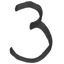

In [14]:
# Example, show a digit
show(digitPathFor['3'])

## Preprocess a predefined digit

In [ ]:
process_cropped_digit(digitPathFor['2'])

# Take a picture from Picamera and process it

In [ ]:
camera_pic = take_a_pic()
preview(camera_pic, 'Recorded image')

cropped_image = crop_to_minimum(camera_pic, 100)
preview(cropped_image, 'Cropped image')

processed_image = process_cropped_digit(cropped_image)

In [43]:
img = Image.open('/tmp/preview_output.png')
img = fit_in_square(img, 20)

preview(img, 'squared')

squared
